In [67]:
import os
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from dotenv import load_dotenv
# Load the environment variables
load_dotenv()

True

In [26]:
payload = '''SELECT f.open, f.high, f.low, f.close, f.tick_vol, f.hist_close, t.*
				FROM PUBLIC.financial_data AS f
				JOIN PUBLIC.technical_data AS t
				ON f.date_time=t.date_time
                ORDER BY f.date_time ASC;'''

In [27]:
database = 'fx_tradingDB'
user = os.getenv('POSTGRE_USERNAME')
password = os.getenv('POSTGRE_PASSWORD')
port = os.getenv('POSTGRE_PORT')

conn = psycopg2.connect(database=database,
                        user=user,
                        password=password,
                        port=port)

cur = conn.cursor()
cur.execute(payload)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
cur.close()
conn.close()

In [28]:
usd_df = pd.DataFrame(rows, columns=columns)
if 'tech_key' in usd_df.columns:  # (To run multiple times without error)
    usd_df.drop(columns='tech_key', inplace=True)

usd_df

,open,high,low,close,tick_vol,hist_close,momentum_kama,others_cr,trend_ema_fast,trend_ema_slow,...,volatility_dch,volatility_dcl,volatility_dcm,volatility_kcc,volatility_kch,volatility_kcl,volume_obv,volume_vpt,volume_vwap,date_time
0,1.0237,1.0239,1.0213,1.0217,403,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-06-11 08:00:00
1,1.0219,1.0227,1.0214,1.022,391,1.0217,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0249,1.0197,403.0,0.0,0.0,2008-06-11 09:00:00
2,1.0221,1.0222,1.0196,1.0196,399,1.022,0.0,0.029362826661438746,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0241166666666666,1.0202166666666668,794.0,0.1148086522462255,0.0,2008-06-11 10:00:00
3,1.0197,1.0205,1.0173,1.0192,480,1.0196,0.0,-0.20553978663012673,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0237666666666667,1.0194333333333334,395.0,-0.822177649123602,0.0,2008-06-11 11:00:00
4,1.0193,1.0195,1.0184,1.0189,239,1.0192,0.0,-0.24469022217871172,0.0,0.0,...,0.0,0.0,0.0,0.0,1.023375,1.0185250000000001,-85.0,-1.0104867899631484,0.0,2008-06-11 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.38337,1.38366,1.38214,1.3822,1842,1.38337,1.3820589433254304,35.39884506215132,1.3821317876205197,1.3818474110242265,...,1.38487,1.3807,1.3827850000000002,1.3819106666666667,1.3831186666666668,1.3807026666666666,3137599.0,1751.4771914233474,1.382098723524962,2024-07-26 19:00:00
99996,1.38219,1.38365,1.38196,1.38332,2192,1.3822,1.3820607165423122,35.28433003817169,1.3821422818327476,1.3818735287261357,...,1.38487,1.3807,1.3827850000000002,1.3820286666666668,1.3833456666666666,1.3807116666666666,3135757.0,1749.9193001867297,1.3821653919222028,2024-07-26 20:00:00
99997,1.38332,1.38395,1.38292,1.38376,1914,1.38332,1.3821256484040352,35.39395125770775,1.3823234692430941,1.381980674746422,...,1.38487,1.3807,1.3827850000000002,1.3821843333333335,1.3836013333333332,1.3807673333333335,3137949.0,1751.6954830835612,1.3822584391906283,2024-07-26 21:00:00
99998,1.38376,1.38398,1.38306,1.38308,1436,1.38376,1.3822544686762286,35.43701673681121,1.382544473974926,1.3821124766170576,...,1.38487,1.3807,1.3827850000000002,1.3824279999999998,1.383866,1.38099,3139863.0,1752.3042793129225,1.3823760486183698,2024-07-26 22:00:00


In [29]:
usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   open                     100000 non-null  object        
 1   high                     100000 non-null  object        
 2   low                      100000 non-null  object        
 3   close                    100000 non-null  object        
 4   tick_vol                 100000 non-null  object        
 5   hist_close               100000 non-null  object        
 6   momentum_kama            100000 non-null  object        
 7   others_cr                100000 non-null  object        
 8   trend_ema_fast           100000 non-null  object        
 9   trend_ema_slow           100000 non-null  object        
 10  trend_ichimoku_a         100000 non-null  object        
 11  trend_ichimoku_b         100000 non-null  object        
 12  trend_ichimoku_ba

In [30]:
msk = list(usd_df.drop('date_time', axis=1).columns)
usd_df[msk] = usd_df[msk].apply(pd.to_numeric)
usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   open                     100000 non-null  float64       
 1   high                     100000 non-null  float64       
 2   low                      100000 non-null  float64       
 3   close                    100000 non-null  float64       
 4   tick_vol                 100000 non-null  float64       
 5   hist_close               100000 non-null  float64       
 6   momentum_kama            100000 non-null  float64       
 7   others_cr                100000 non-null  float64       
 8   trend_ema_fast           100000 non-null  float64       
 9   trend_ema_slow           100000 non-null  float64       
 10  trend_ichimoku_a         100000 non-null  float64       
 11  trend_ichimoku_b         100000 non-null  float64       
 12  trend_ichimoku_ba

In [31]:
usd_df.describe().T

,count,mean,min,25%,50%,75%,max,std
open,100000.0,1.206908,0.9414,1.053127,1.26213,1.32397,1.46838,0.138542
high,100000.0,1.20781,0.94207,1.05428,1.26308,1.32475,1.46895,0.138576
low,100000.0,1.206015,0.94062,1.05222,1.26112,1.32323,1.46375,0.13851
close,100000.0,1.206915,0.94141,1.05313,1.262135,1.32399,1.46841,0.138545
tick_vol,100000.0,2725.73743,1.0,1058.0,1981.0,3545.0,29419.0,2439.530821
hist_close,100000.0,1.206901,0.0,1.053127,1.26213,1.32399,1.46841,0.138597
momentum_kama,100000.0,1.20679,0.0,1.052976,1.26199,1.323984,1.463231,0.139017
others_cr,100000.0,18.127795,-7.858471,3.076001,23.532348,29.586963,43.722228,13.560295
trend_ema_fast,100000.0,1.206769,0.0,1.052973,1.261985,1.323986,1.463037,0.13914
trend_ema_slow,100000.0,1.206601,0.0,1.052857,1.261752,1.324023,1.460259,0.139831


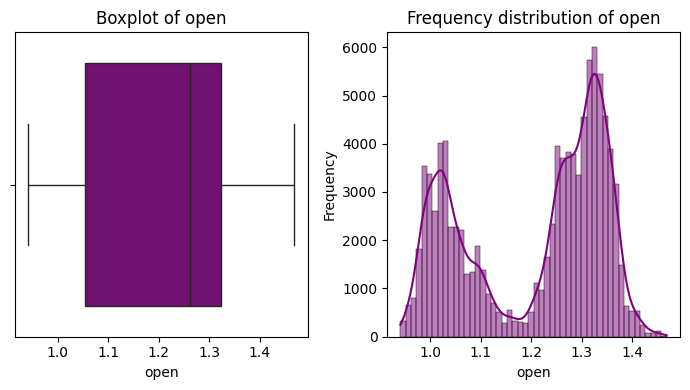

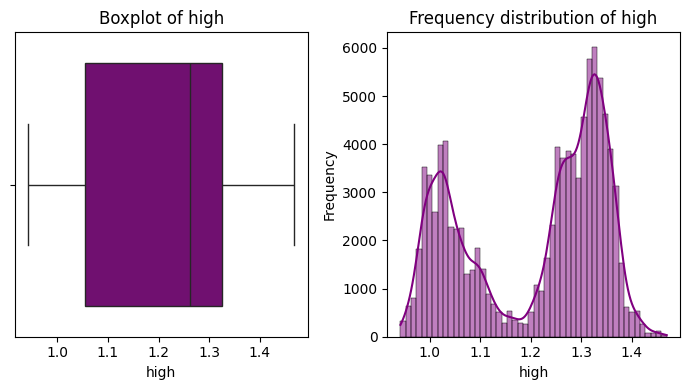

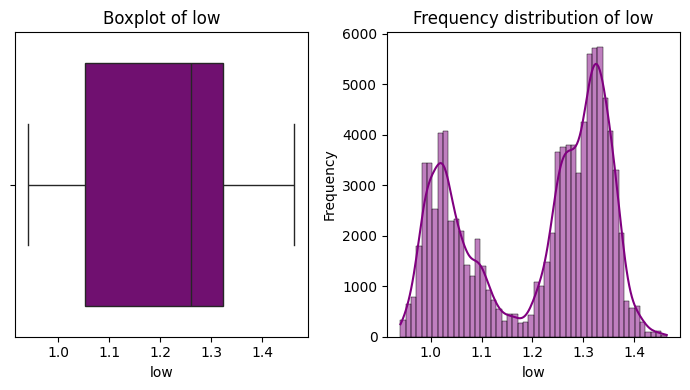

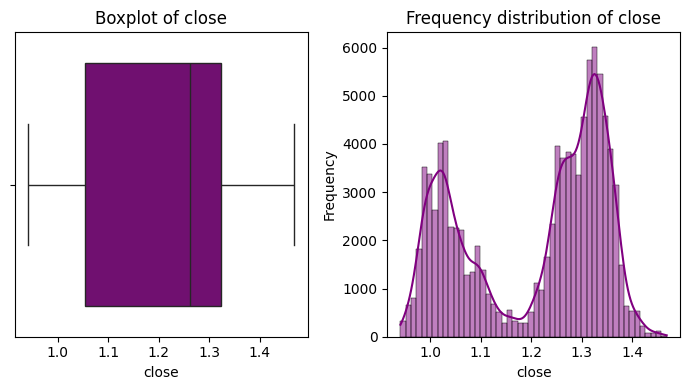

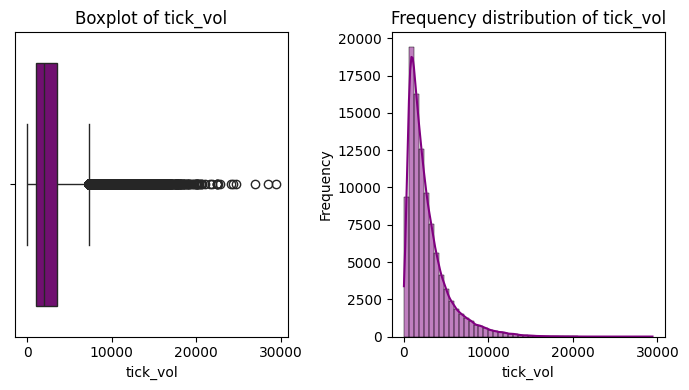

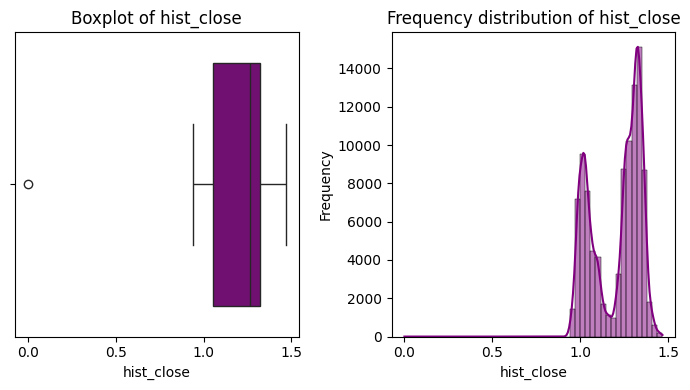

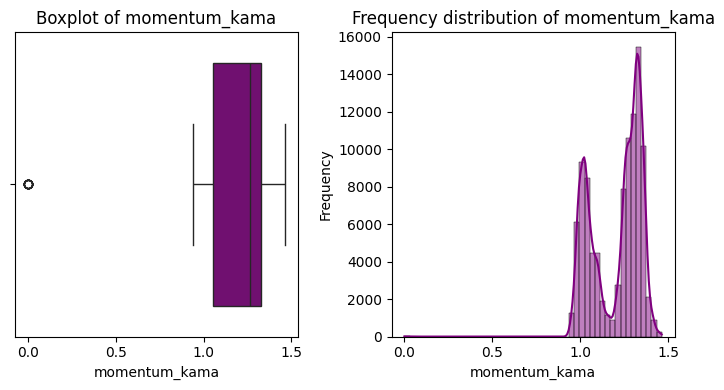

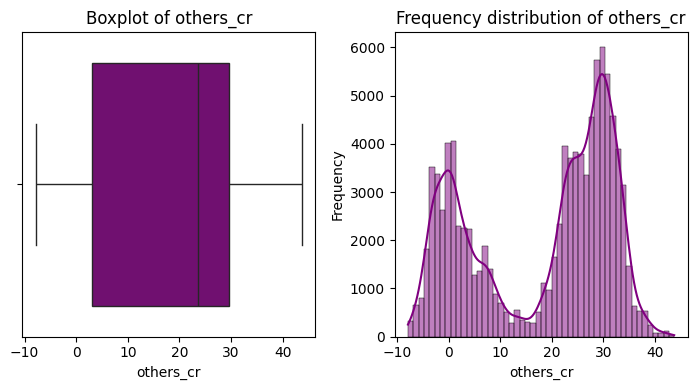

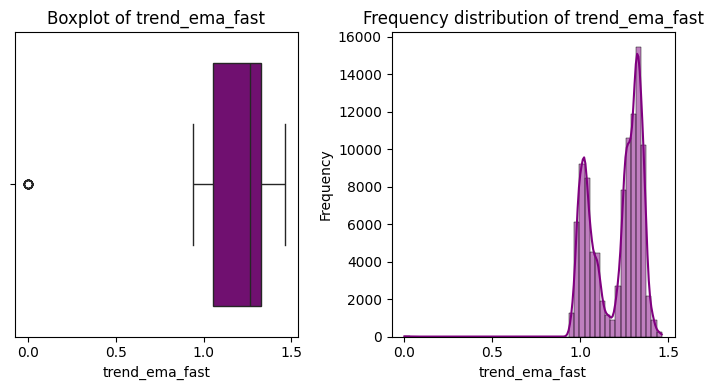

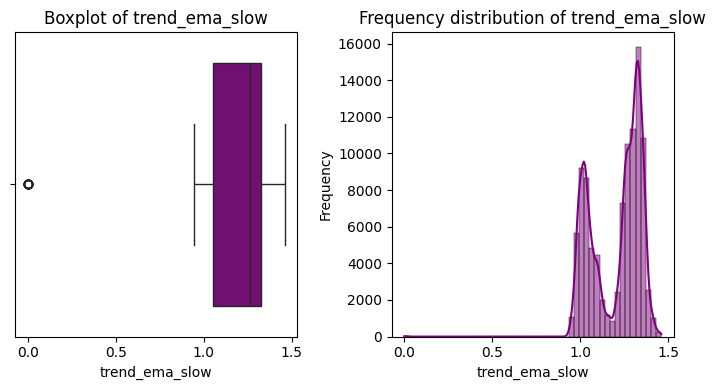

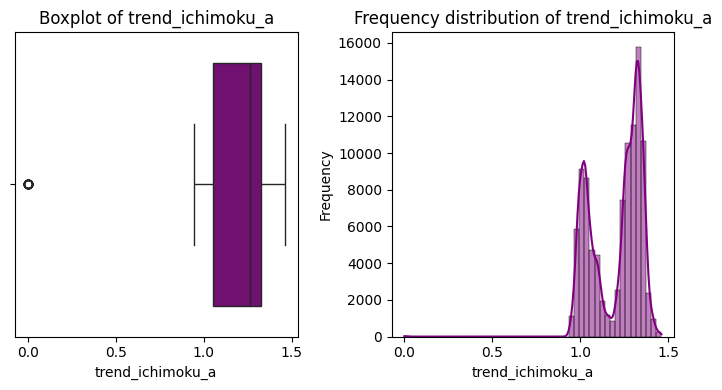

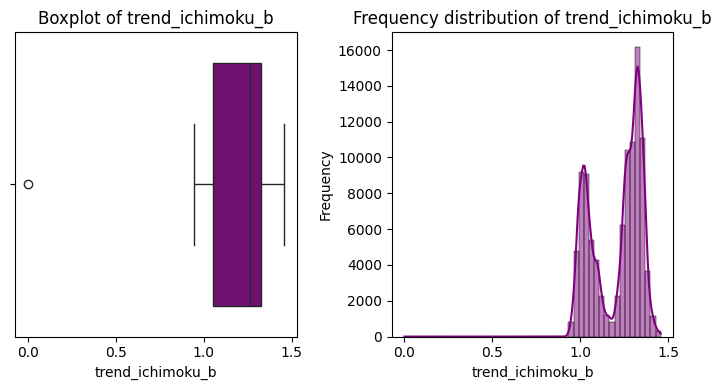

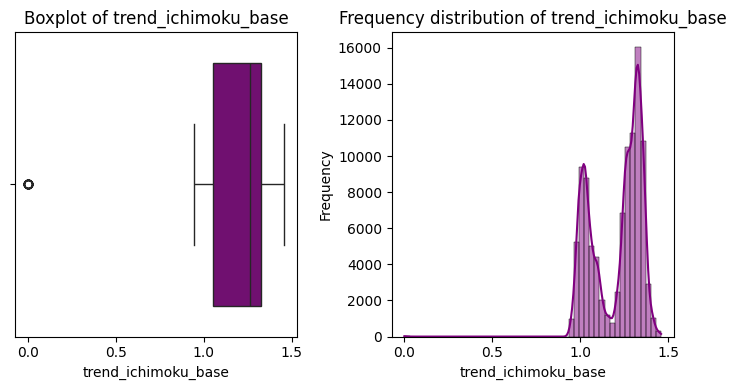

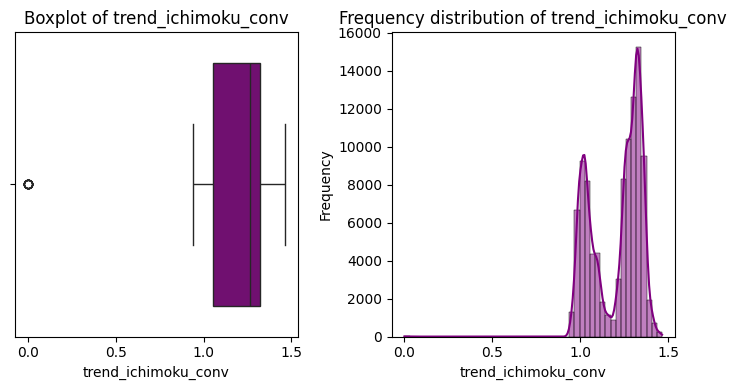

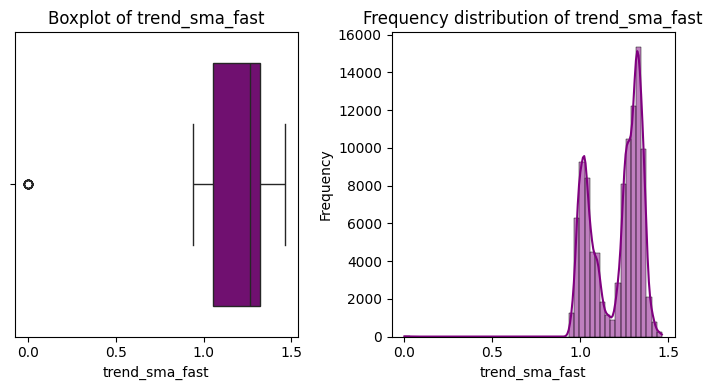

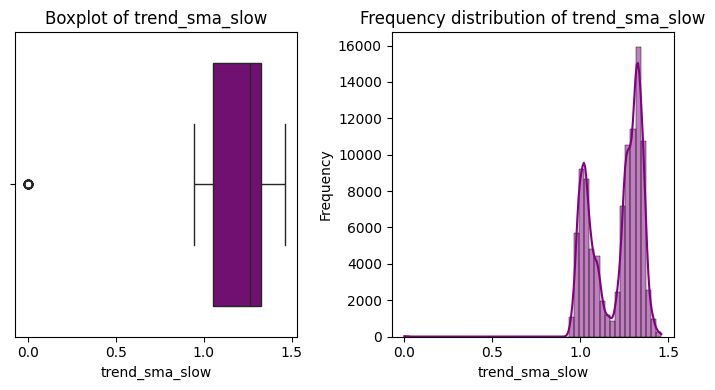

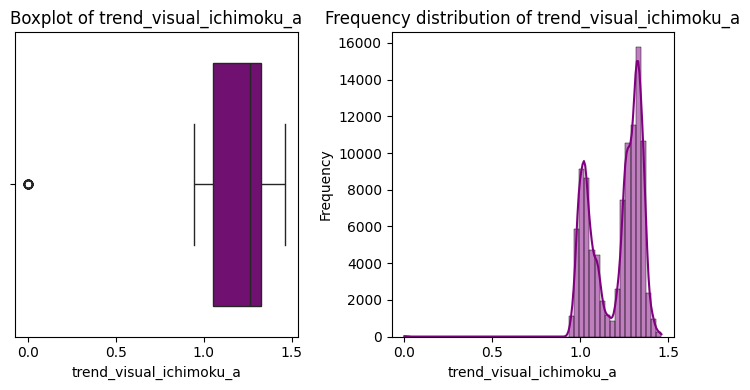

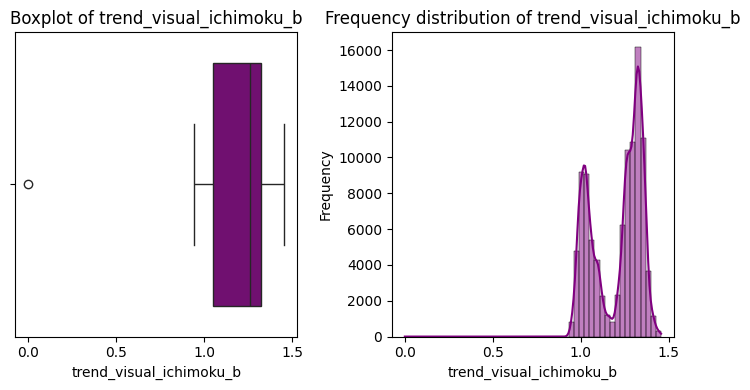

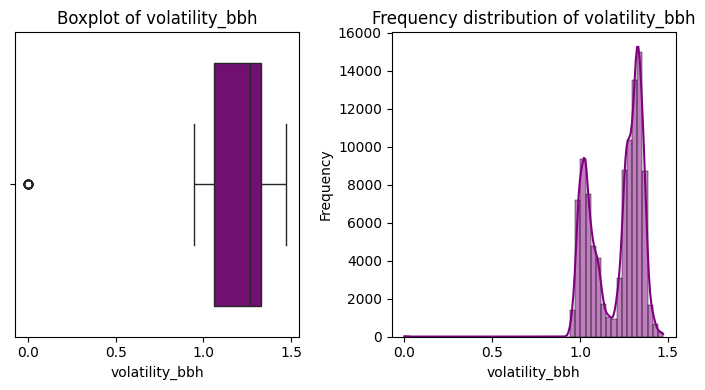

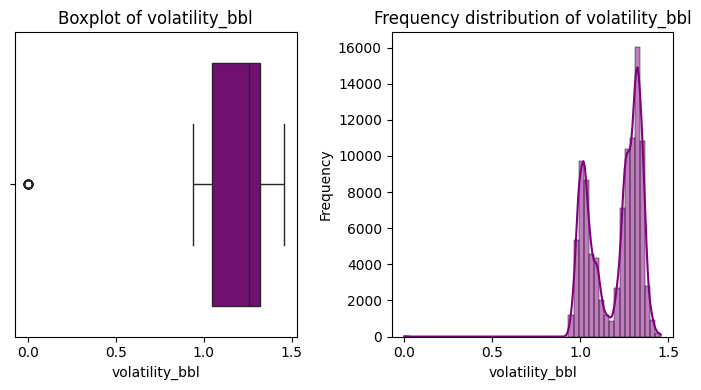

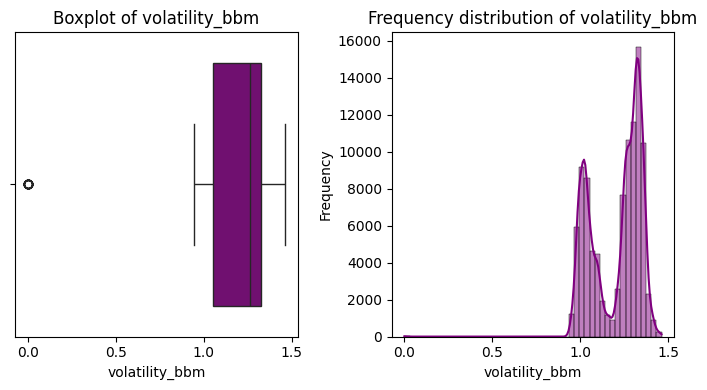

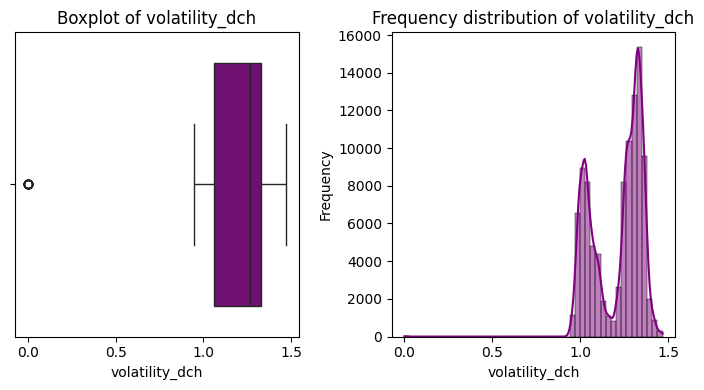

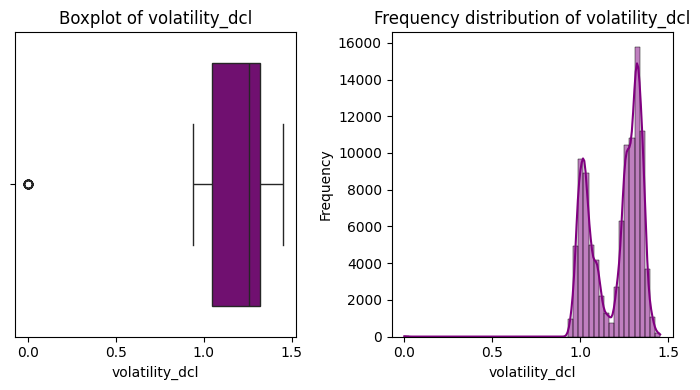

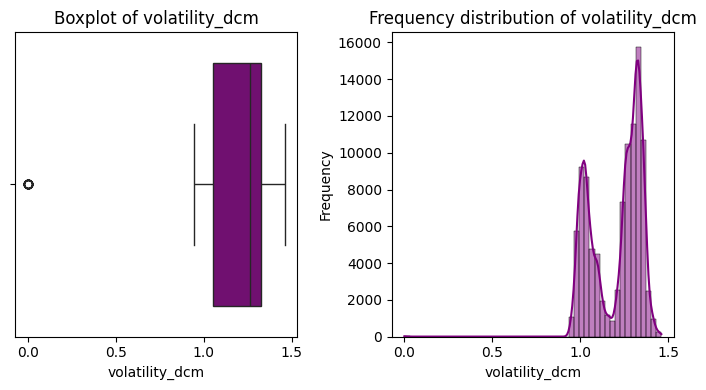

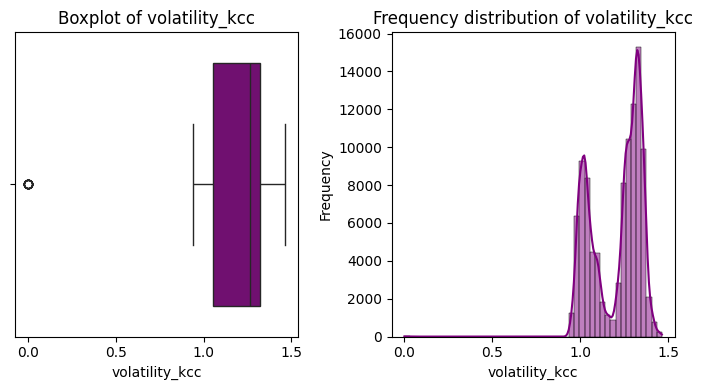

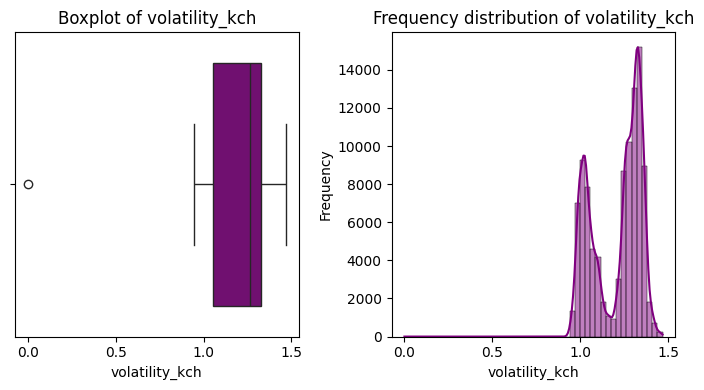

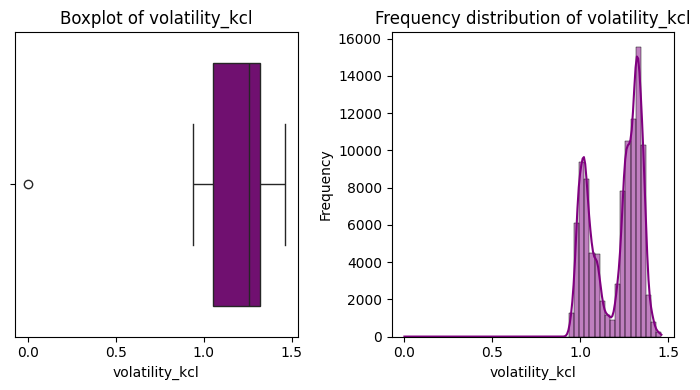

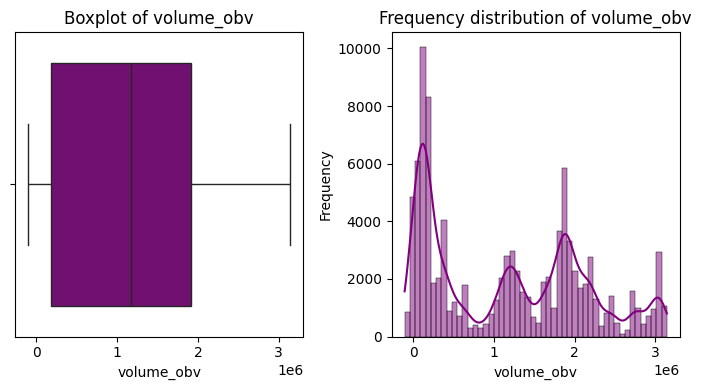

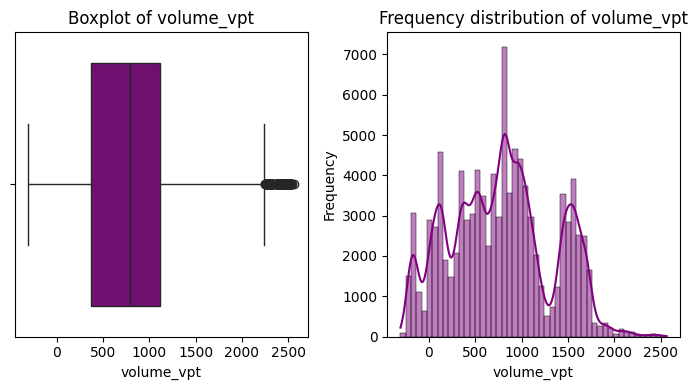

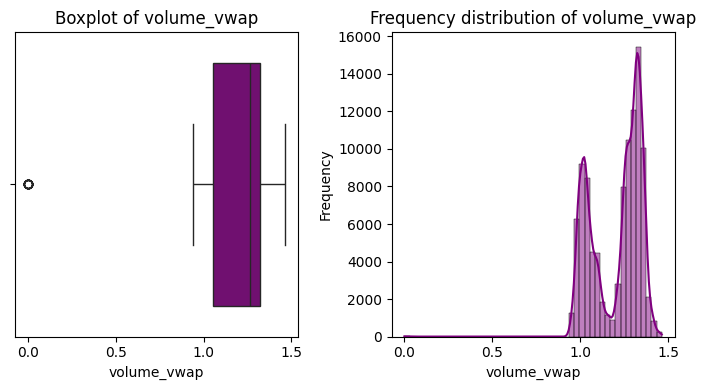

In [32]:
# Handle max open warning
plt.rcParams.update({'figure.max_open_warning': 0})

for column in usd_df.columns:

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
    sns.boxplot(usd_df[column], orient='h', color='purple', ax=ax1)
    ax1.set_xlabel(f'{column}')
    ax1.set_title(f'Boxplot of {column}')


    sns.histplot(usd_df[column], bins=50, color='purple', kde=True, ax=ax2)
    ax2.set_xlabel(f'{column}')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Frequency distribution of {column}')

    plt.tight_layout()

plt.close();

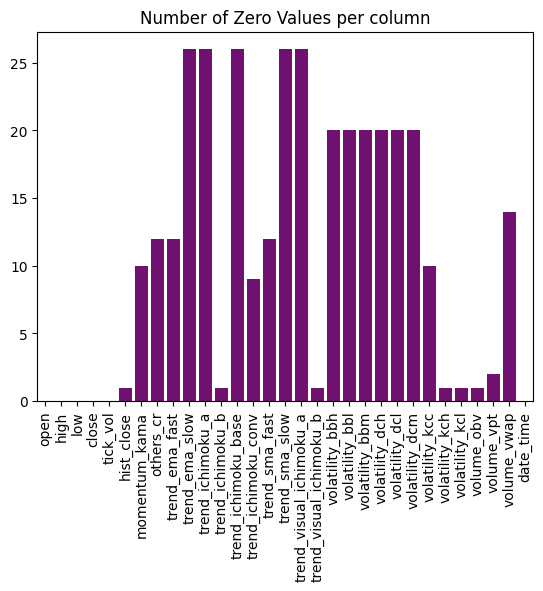

In [47]:
# usd_df.drop('others_cr', axis=1)[usd_df.values==0]
zeros_per_column = {}
for column in usd_df.columns:
    x = {column: usd_df[column].isin([0]).sum()}
    zeros_per_column.update(x)

sns.barplot(zeros_per_column, color='purple')
plt.title('Number of Zero Values per column')
plt.xticks(rotation = 90);



In [51]:
usd_df.shape

(100000, 31)

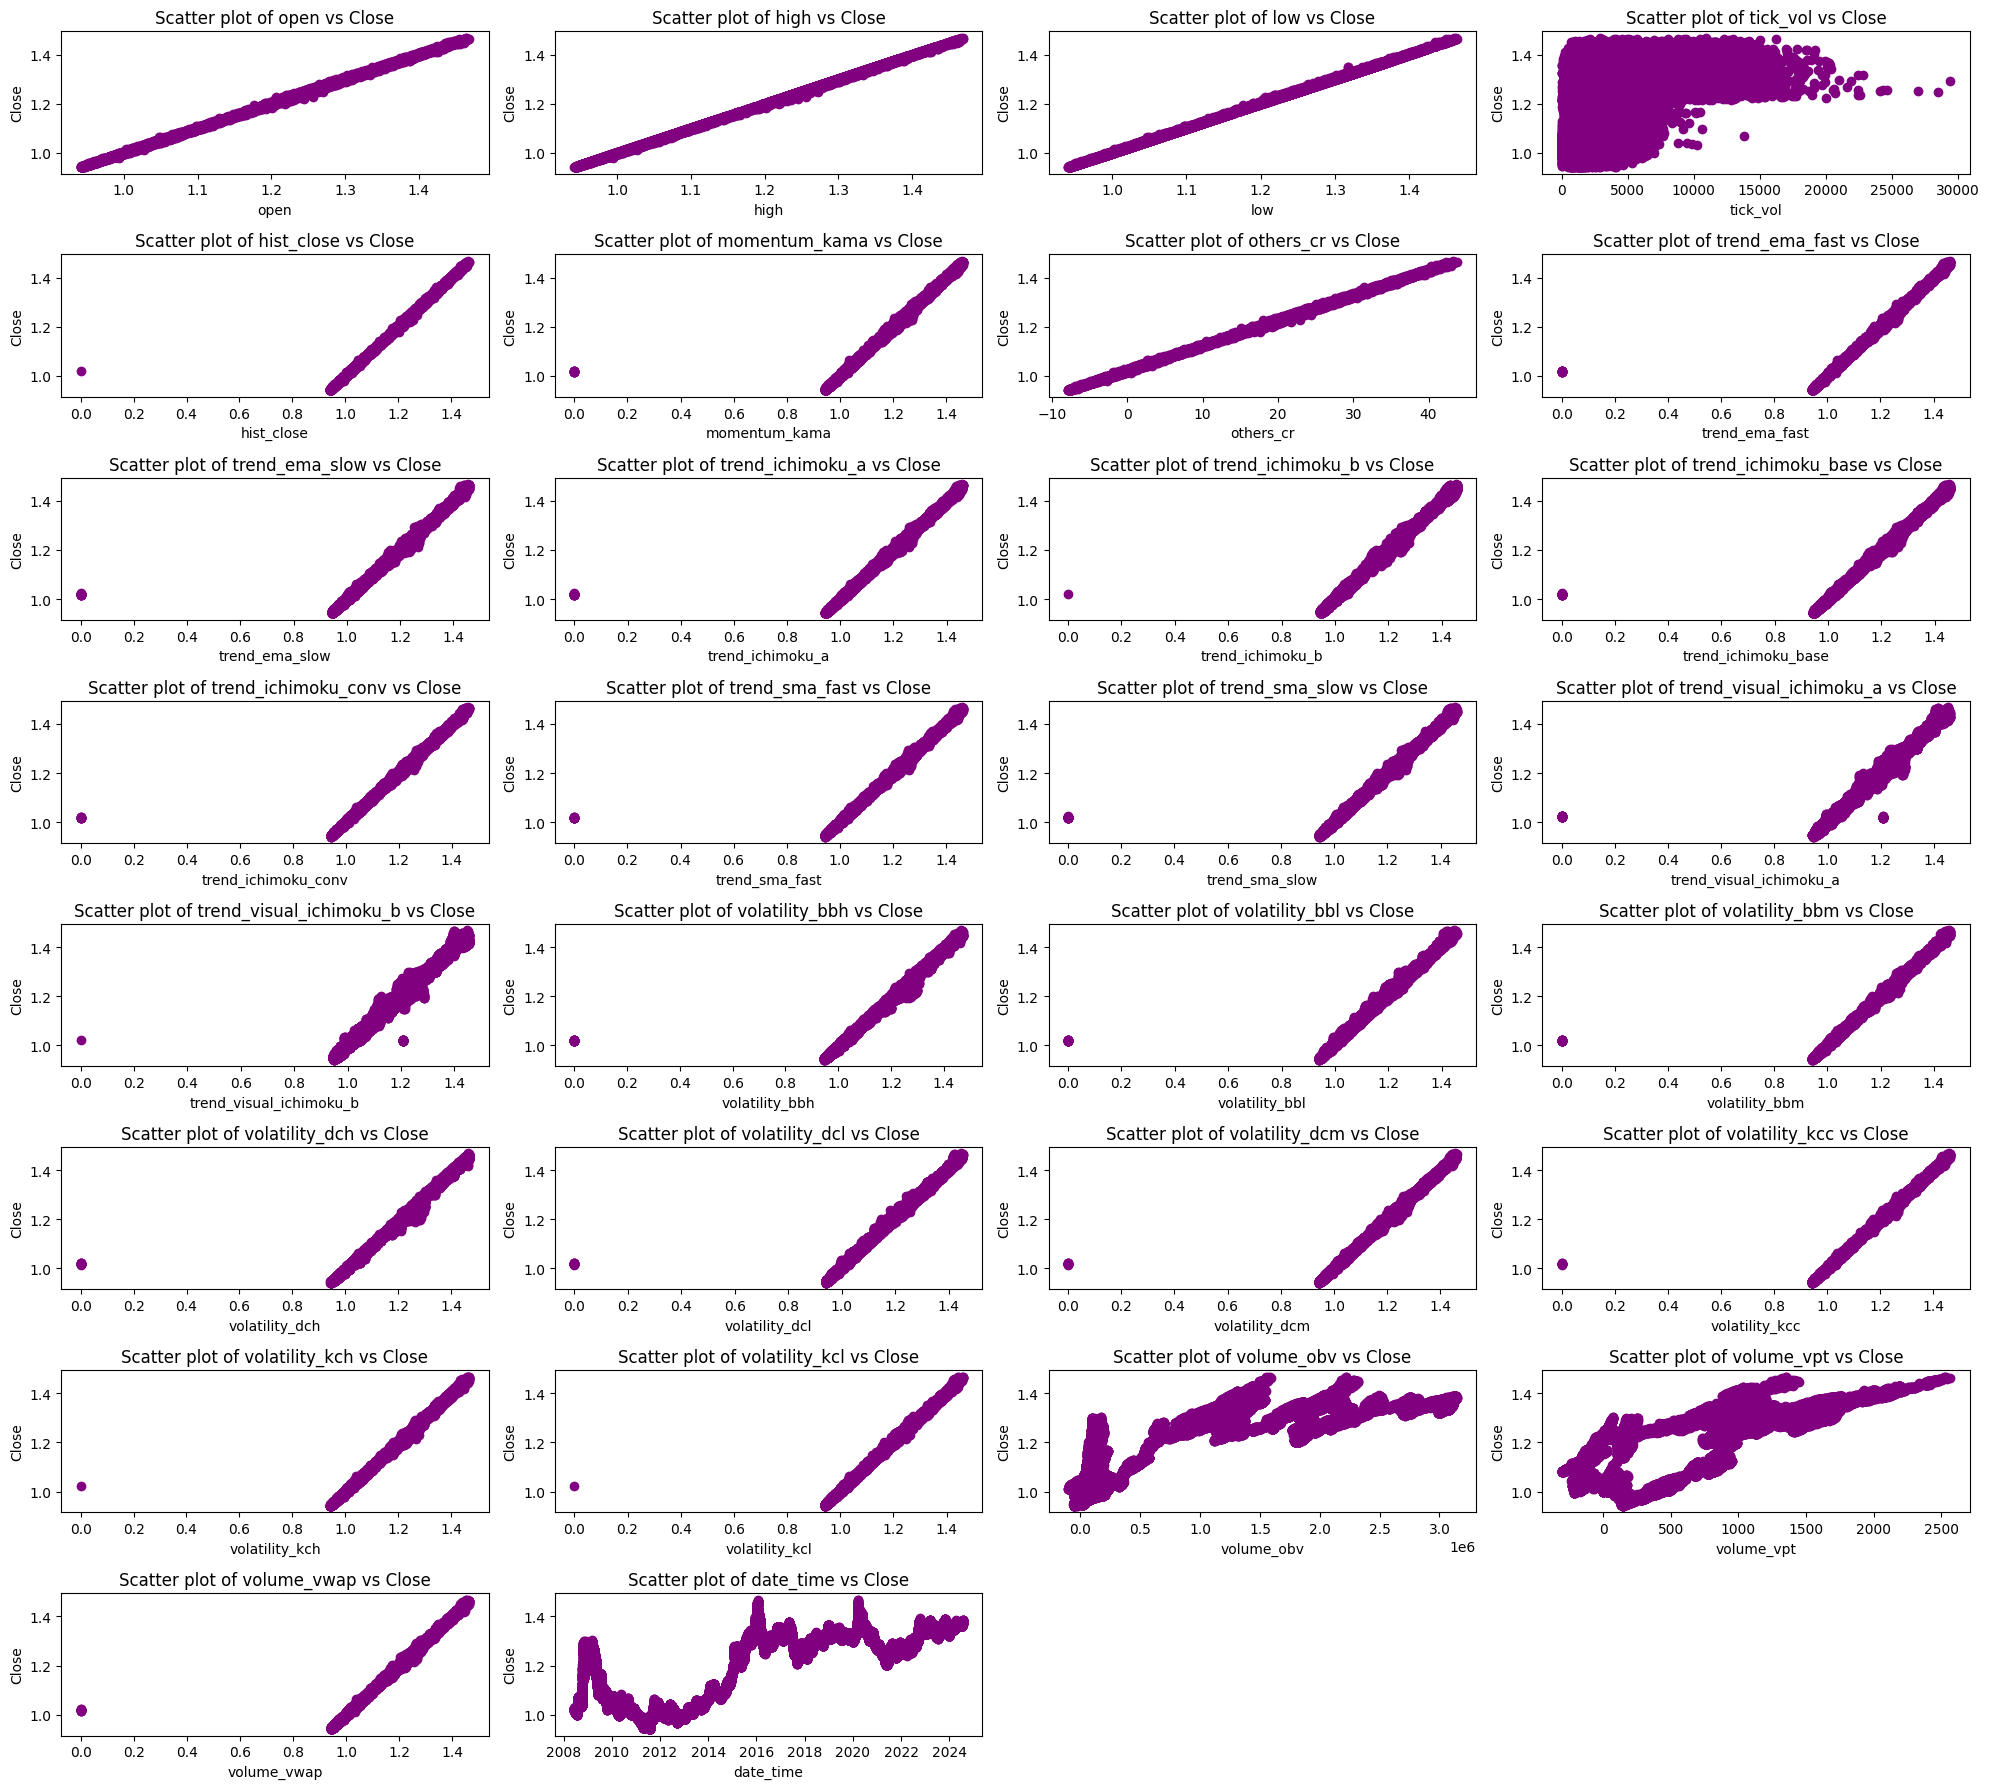

In [52]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 18))
ax = ax.flatten()
for i, column in enumerate(usd_df.drop(columns=['close']).columns):
    ax[i].scatter(usd_df[column], usd_df['close'], c = 'purple')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Close')
    ax[i].set_title(f'Scatter plot of {column} vs Close')
    
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

    plt.tight_layout();

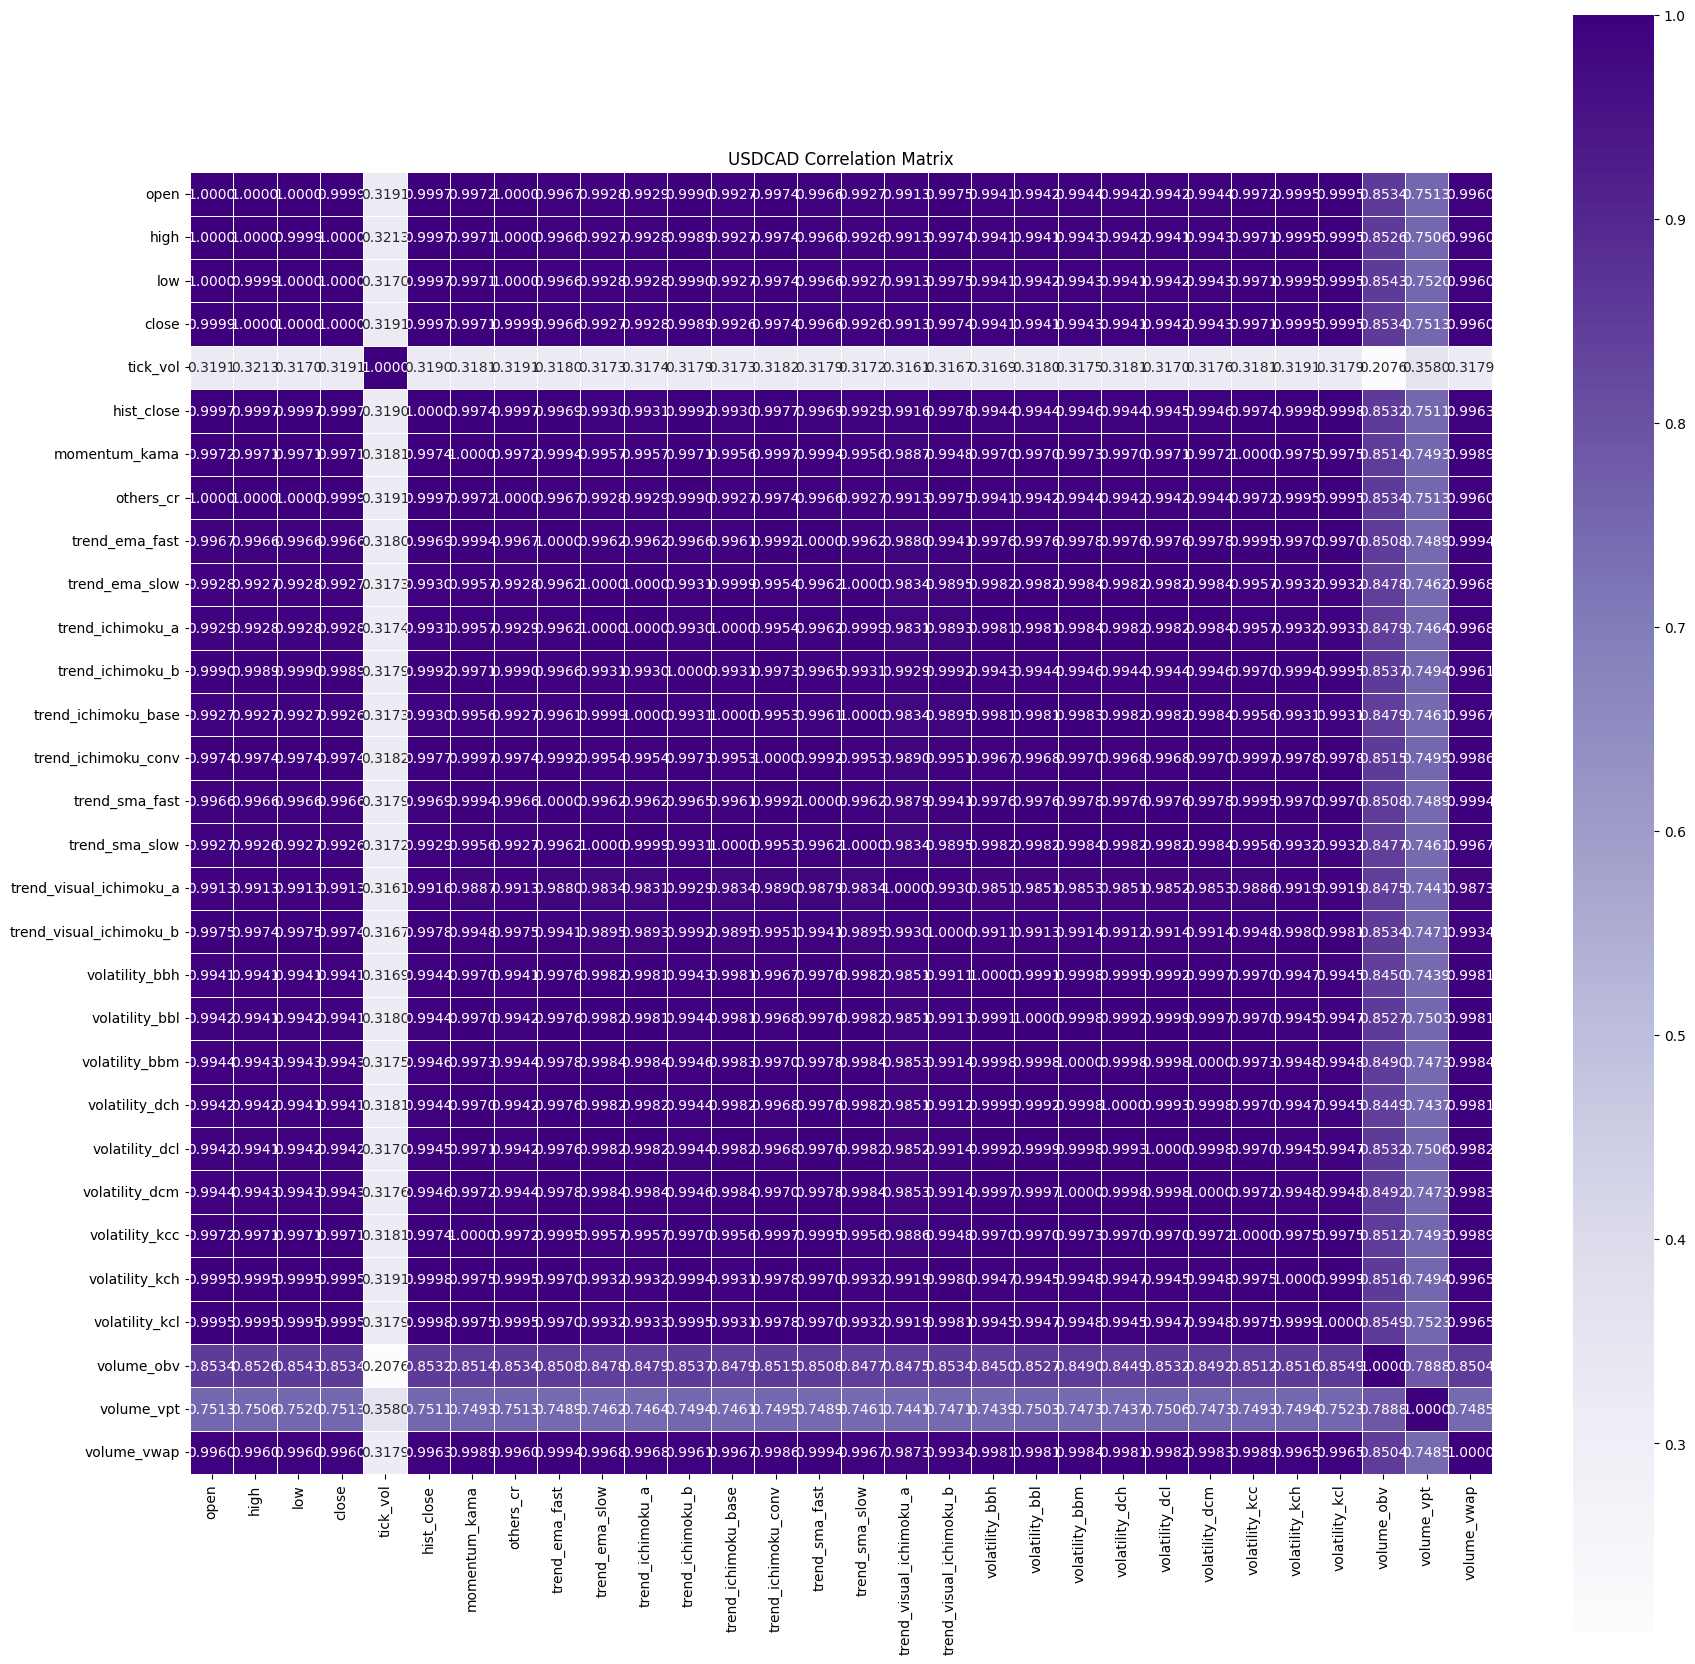

In [62]:
cor_matrix = y.corr()

plt.figure(figsize=(21, 21))
sns.heatmap(cor_matrix, annot=True, cmap = 'Purples', fmt='.4f',
            linewidths=0.5, square=True)
plt.title('USDCAD Correlation Matrix');

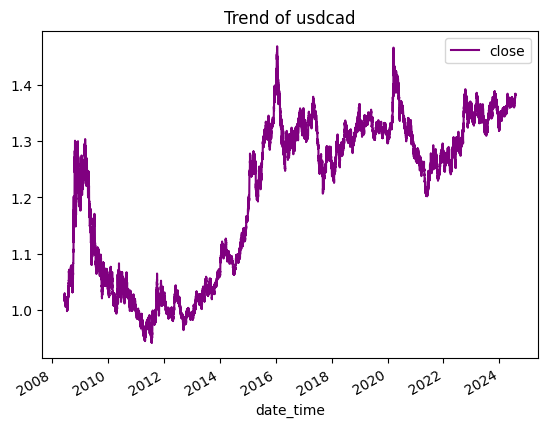

In [66]:
usd_df.plot.line(x='date_time', y='close', color='purple')
plt.title('Trend of usdcad');

In [70]:
usd_df.shape

(100000, 31)

In [72]:
X = add_constant(usd_df.drop(columns= 'date_time'))
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)


c:\Users\asoye\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


const                      3.346831e+07
open                       6.498746e+05
high                       5.628211e+04
low                        5.223934e+04
close                      5.185530e+04
tick_vol                   1.603234e+00
hist_close                 1.415820e+04
momentum_kama              2.296266e+04
others_cr                  6.154194e+05
trend_ema_fast             2.156969e+05
trend_ema_slow             1.601426e+05
trend_ichimoku_a           1.473607e+05
trend_ichimoku_b           7.653684e+03
trend_ichimoku_base        6.854981e+04
trend_ichimoku_conv        2.061060e+03
trend_sma_fast             2.163573e+05
trend_sma_slow             7.097438e+04
trend_visual_ichimoku_a    7.428848e+01
trend_visual_ichimoku_b    1.951181e+03
volatility_bbh                      inf
volatility_bbl                      inf
volatility_bbm                      inf
volatility_dch                      inf
volatility_dcl                      inf
volatility_dcm                      inf
